# COVID-19 Mundo.

- Utilizando os datasets que do JOHNS HOPKINS link: https://github.com/CSSEGISandData/COVID-19, foram feitas análises e criado um dataset apenas com os dados da pandemia no Brasil.

## 1.0 Importando as bibliotecas e carregando os arquivos.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
url_2='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [4]:
url_3= 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [5]:
dados_covid19 = pd.read_csv(url, sep=',')

In [6]:
dados_deaths_covid19 = pd.read_csv(url_2, sep=',')

In [7]:
dados_recovered_covid19 = pd.read_csv(url_3, sep=',')

## 2.0 Tratando os dados dos datasets da covid 19.

In [8]:
dados_covid19 = dados_covid19.groupby('Country/Region').sum()
dados_covid19 = dados_covid19.drop(columns=['Lat','Long'])
dados_covid19.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,55492,55514,55518,55540,55557,55575,55580,55604,55617,55646,55664,55680,55696,55707,55714,55733,55759,55770,55775,55827,55840,55847,55876,55876,55894,55917,55959,55959,55985,55985,55995,56016,56044,56069,56093,56103,56153,56177,56192,56226
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,93075,93850,94651,95726,96838,97909,99062,100246,101285,102306,103327,104313,105229,106215,107167,107931,108823,109674,110521,111301,112078,112897,113580,114209,114840,115442,116123,116821,117474,118017,118492,118938,119528,120022,120541,121200,121544,121847,122295,122767
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,110711,110894,111069,111247,111418,111600,111764,111917,112094,112279,112461,112622,112805,112960,113092,113255,113430,113593,113761,113948,114104,114234,114382,114543,114681,114851,115008,115143,115265,115410,115540,115688,115842,115970,116066,116157,116255,116349,116438,116543
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10503,10538,10555,10583,10610,10645,10672,10699,10712,10739,10775,10799,10822,10849,10866,10889,10908,10948,10976,10998,11019,11042,11069,11089,11130,11130,11199,11228,11266,11289,11319,11360,11393,11431,11481,11517,11545,11591,11638,11687
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,20366,20381,20389,20400,20452,20478,20499,20519,20548,20584,20640,20695,20759,20782,20807,20854,20882,20923,20981,21026,21055,21086,21108,21114,21161,21205,21265,21323,21380,21407,21446,21489,21558,21642,21696,21733,21757,21774,21836,21914


In [9]:
dados_covid19.shape

(192, 429)

In [10]:
dados_deaths_covid19 = dados_deaths_covid19.groupby('Country/Region').sum()
dados_deaths_covid19 = dados_deaths_covid19.drop(columns=['Lat','Long'],axis=1)
dados_deaths_covid19.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2427,2427,2428,2428,2430,2430,2430,2432,2433,2435,2436,2438,2442,2443,2443,2444,2446,2446,2446,2449,2449,2449,2451,2451,2451,2451,2454,2454,2457,2459,2460,2460,2462,2462,2462,2463,2464,2466,2466,2467
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1555,1567,1582,1600,1617,1636,1653,1666,1681,1696,1715,1736,1756,1775,1796,1816,1835,1856,1876,1897,1918,1939,1956,1969,1986,2002,2018,2030,2045,2060,2077,2092,2106,2122,2133,2137,2145,2156,2171,2184
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2939,2943,2945,2947,2950,2954,2958,2961,2964,2967,2970,2973,2977,2979,2983,2987,2991,2996,3002,3007,3010,3013,3018,3022,3026,3028,3031,3034,3036,3040,3045,3048,3051,3053,3055,3057,3061,3066,3069,3071
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,109,110,110,110,110,110,110,110,110,112,112,112,112,112,112,112,112,112,112,112,113,113,113,113,113,113,113,113,113,113,114,114
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,492,493,494,496,498,498,498,499,499,500,501,502,504,506,508,508,510,510,511,511,512,514,515,516,516,517,519,520,521,521,522,522,522,524,526,527,530,530,532,532


In [11]:
dados_deaths_covid19.shape

(192, 429)

In [12]:
dados_recovered_covid19 = dados_recovered_covid19.groupby('Country/Region').sum()
dados_recovered_covid19 = dados_recovered_covid19.drop(columns=[ 'Lat','Long'])
dados_recovered_covid19.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21,2/21/21,2/22/21,2/23/21,2/24/21,2/25/21,2/26/21,2/27/21,2/28/21,3/1/21,3/2/21,3/3/21,3/4/21,3/5/21,3/6/21,3/7/21,3/8/21,3/9/21,3/10/21,3/11/21,3/12/21,3/13/21,3/14/21,3/15/21,3/16/21,3/17/21,3/18/21,3/19/21,3/20/21,3/21/21,3/22/21,3/23/21,3/24/21,3/25/21
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,48395,48433,48514,48626,48798,48803,48820,48834,48895,48967,49086,49281,49285,49288,49333,49344,49347,49359,49362,49362,49369,49378,49402,49409,49499,49499,49499,49471,49477,49481,49499,49536,49664,49681,49681,49737,49743,49752,49802,49937
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,56764,57736,58794,59684,60675,61605,62533,63329,64318,65403,66309,67158,68007,68969,69773,70413,71173,72076,72853,73610,74352,75190,75887,76784,77498,78259,79131,79821,80483,81061,81810,82554,83264,83954,84625,85147,85846,86497,87193,87760
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,75999,76168,76330,76489,76640,76797,76940,77076,77225,77382,77537,77683,77842,77976,78098,78234,78377,78524,78672,78824,78946,79064,79187,79319,79428,79556,79672,79783,79887,79994,80103,80219,80347,80455,80566,80659,80887,80981,81065,81065
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,9911,9965,10022,10066,10101,10146,10170,10206,10245,10285,10319,10356,10394,10429,10446,10475,10501,10560,10564,10584,10599,10626,10661,10685,10708,10708,10754,10775,10796,10795,10861,10883,10904,10925,10952,10973,11014,11050,11082,11111
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,18795,18884,18929,18951,18972,18991,19005,19013,19190,19207,19221,19238,19307,19315,19322,19400,19410,19509,19553,19624,19640,19647,19657,19677,19761,19827,19835,19848,19850,19948,19971,20028,20032,20065,20068,20073,20090,20099,20172,20190


In [13]:
dados_recovered_covid19.shape

(192, 429)

- Criando um df que englobe o total de casos, óbitos e recuperados por país.

In [14]:
paises=[]
casos=[]
for i in dados_covid19.T.columns:
    paises.append(i)
    casos.append(dados_covid19.T[i][-1])

In [15]:
dic = dict(zip(paises,casos))
total_dados_covid19 = pd.DataFrame([dic]).T.reset_index()
total_dados_covid19.columns = ['pais','total_de_casos']

In [16]:
def casos(data):
  casos=[]
  for i in data.T.columns:
      casos.append(data.T[i][-1])
  return casos

In [17]:
deaths = casos(dados_deaths_covid19)
total_dados_covid19['total_de_mortes'] = deaths

In [18]:
total_dados_covid19.tail()

,pais,total_de_casos,total_de_mortes
187,Vietnam,2579,35
188,West Bank and Gaza,232038,2521
189,Yemen,3816,810
190,Zambia,87318,1191
191,Zimbabwe,36778,1518


In [19]:
recovered = casos(dados_recovered_covid19)
total_dados_covid19['total_de_recuperados'] = recovered

In [20]:
total_dados_covid19.query('total_de_recuperados == 0')

,pais,total_de_casos,total_de_mortes,total_de_recuperados
16,Belgium,854608,22816,0
152,Serbia,571895,5075,0
166,Sweden,773690,13373,0
178,US,30079282,546822,0


- Como pode ser observado acima existem algumas informações inconsistentes.

In [21]:
total_dados_covid19.iloc[16,3] = 31130
total_dados_covid19.iloc[152,3] = 15564
total_dados_covid19.iloc[178,3] = 6298082

In [22]:
total_dados_covid19.query('total_de_recuperados == 0')

,pais,total_de_casos,total_de_mortes,total_de_recuperados
166,Sweden,773690,13373,0


In [23]:
total_dados_covid19.sort_values(by='total_de_mortes', ascending=False)

,pais,total_de_casos,total_de_mortes,total_de_recuperados
178,US,30079282,546822,6298082
23,Brazil,12320169,303462,10808499
114,Mexico,2214542,200211,1752125
79,India,11846652,160949,11264637
182,United Kingdom,4332922,126684,12563
...,...,...,...,...
95,Laos,49,0,45
185,Vanuatu,3,0,1
147,Samoa,3,0,2
144,Saint Kitts and Nevis,44,0,42


In [24]:
total_dados_covid19 = total_dados_covid19.set_index('pais')

## 3.0 Calculando a taxa de letalidade.

- Taxa de letalidade no mundo.

In [25]:
sum_up = total_dados_covid19.sum()
sum_up

total_de_casos          125491735
total_de_mortes           2755210
total_de_recuperados     77443255
dtype: int64

In [26]:
taxa_let_mundo = sum_up['total_de_mortes'] / sum_up['total_de_casos'] * 100
taxa_let_mundo_2 = sum_up['total_de_mortes'] / ( sum_up['total_de_mortes'] + sum_up['total_de_recuperados']) *100

print(taxa_let_mundo)
print(taxa_let_mundo_2)

2.1955310443353104
3.4354896942229507


- Taxa de letalidade por país.

In [27]:
letalidade_1 = total_dados_covid19['total_de_mortes'] / total_dados_covid19['total_de_casos'] * 100
total_dados_covid19['letalidade_1'] = letalidade_1
letalidade_2 = total_dados_covid19['total_de_mortes'] / ( total_dados_covid19['total_de_mortes'] + total_dados_covid19['total_de_recuperados']) *100
total_dados_covid19['letalidade_2'] = letalidade_2
total_dados_covid19.head()

,total_de_casos,total_de_mortes,total_de_recuperados,letalidade_1,letalidade_2
pais,,,,,
Afghanistan,56226,2467,49937,4.387650,4.707656
Albania,122767,2184,87760,1.778980,2.428178
Algeria,116543,3071,81065,2.635079,3.650043
Andorra,11687,114,11111,0.975443,1.015590
Angola,21914,532,20190,2.427672,2.567320


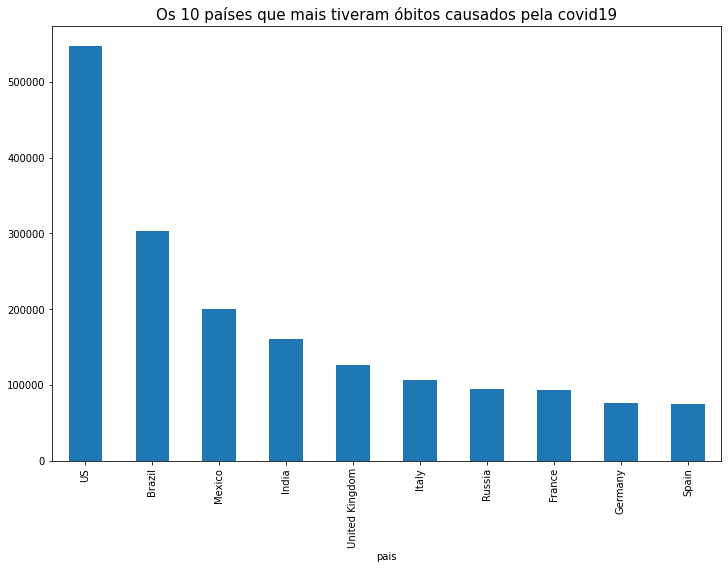

In [28]:
plt.figure(figsize=(12,8))
total_dados_covid19['total_de_mortes'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Os 10 países que mais tiveram óbitos causados pela covid19', fontsize=15)
plt.show()

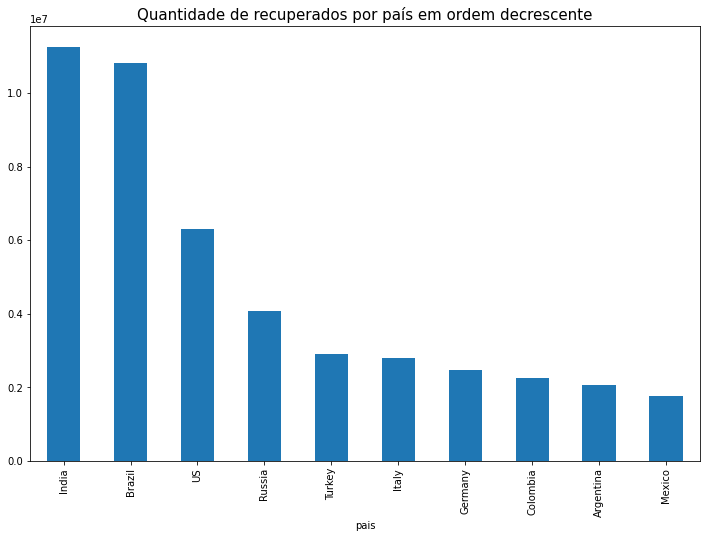

In [29]:
plt.figure(figsize=(12,8))
total_dados_covid19['total_de_recuperados'].sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Quantidade de recuperados por país em ordem decrescente', fontsize=15)
plt.show()

In [30]:
total_dados_covid19.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
total_de_casos,192.0,653602.79,2571035.55,1.0,7079.00,78029.00,294353.00,30079282.00
total_de_mortes,192.0,14350.05,51308.88,0.0,107.75,882.50,6090.75,546822.00
total_de_recuperados,192.0,403350.29,1307532.74,0.0,4949.25,43442.00,216158.00,11264637.00
letalidade_1,192.0,2.06,2.44,0.0,0.99,1.68,2.53,22.22
letalidade_2,192.0,4.50,11.39,0.0,1.16,1.88,3.46,100.00


In [31]:
total_dados_covid19.query('letalidade_1 > 6')

,total_de_casos,total_de_mortes,total_de_recuperados,letalidade_1,letalidade_2
pais,,,,,
MS Zaandam,9,2,7,22.222222,22.222222
Mexico,2214542,200211,1752125,9.040741,10.254946
Sudan,31407,2028,23990,6.457159,7.794604
Syria,18046,1206,12022,6.682921,9.117024
Yemen,3816,810,1580,21.226415,33.891213


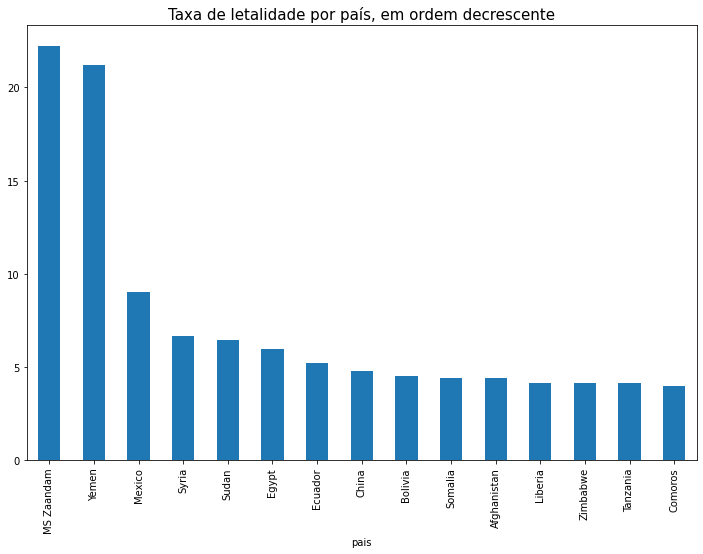

In [32]:
plt.figure(figsize=(12,8))
total_dados_covid19['letalidade_1'].sort_values(ascending=False).head(15).plot(kind='bar')
plt.title('Taxa de letalidade por país, em ordem decrescente', fontsize=15)
plt.show()

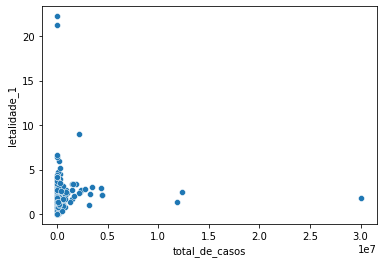

In [33]:
sns.scatterplot(x='total_de_casos', y='letalidade_1',data=total_dados_covid19)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


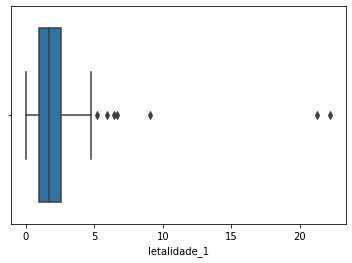

In [34]:
sns.boxplot(total_dados_covid19['letalidade_1'])

In [35]:
total_dados_covid19.query('total_de_casos > 1000')

,total_de_casos,total_de_mortes,total_de_recuperados,letalidade_1,letalidade_2
pais,,,,,
Afghanistan,56226,2467,49937,4.387650,4.707656
Albania,122767,2184,87760,1.778980,2.428178
Algeria,116543,3071,81065,2.635079,3.650043
Andorra,11687,114,11111,0.975443,1.015590
Angola,21914,532,20190,2.427672,2.567320
...,...,...,...,...,...
Vietnam,2579,35,2265,1.357115,1.521739
West Bank and Gaza,232038,2521,205289,1.086460,1.213127
Yemen,3816,810,1580,21.226415,33.891213


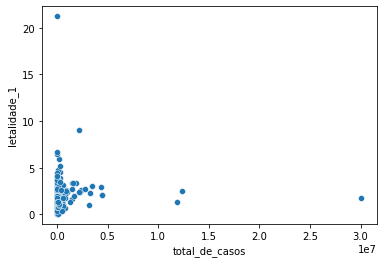

In [36]:
sns.scatterplot(x='total_de_casos', y='letalidade_1',data=total_dados_covid19.query('total_de_casos > 1000'))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


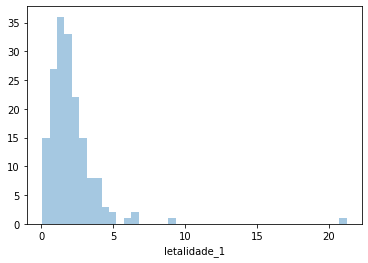

In [37]:
sns.distplot(total_dados_covid19.query('total_de_casos > 1000')['letalidade_1'], kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


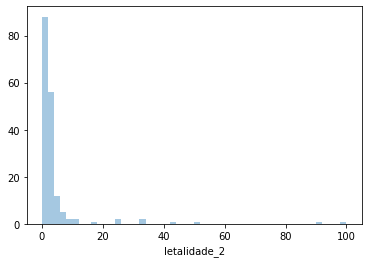

In [38]:
sns.distplot(total_dados_covid19.query('total_de_casos > 1000')['letalidade_2'], kde=False)

In [39]:
def plot_serie_historica(df,x,y):
  df.T[[x,y]].plot()

- Comparando os dados da covid19 na Reino Unido, USA e Brasil.

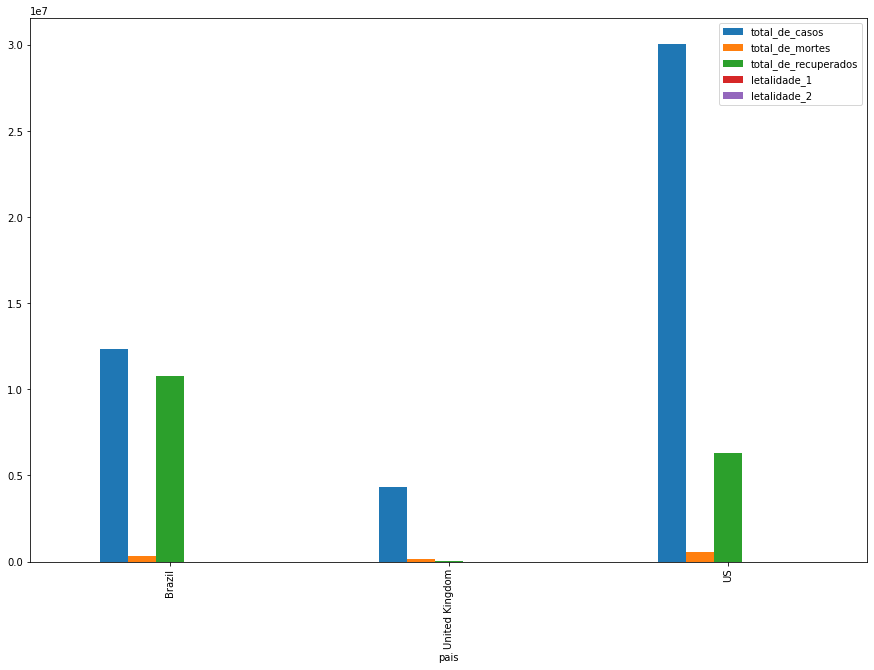

In [42]:
total_dados_covid19.loc[['Brazil','United Kingdom','US']].plot(kind='bar',figsize=(15,10))